# Find out optimal number of traveller groups:

In [3]:
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt
import numpy as np

def get_centroids_and_labels(numpy_arr, n):
    k_means = KMeans(n_clusters=n)
    k_means.fit(numpy_arr)
    centroids = k_means.cluster_centers_
    labels = k_means.labels_
    return centroids, labels, k_means

def compute_SSE(k_means):
    SSE = k_means.inertia_
    return SSE

def compute_silhouette(centroids, labels):
    silhouette = sklearn.metrics.silhouette_score(numpy_arr, labels)
    return silhouette

def compute_gap_statistics(centroids, labels, k_means):
        nrefs = 5
        refDisps = np.zeros(nrefs)
        for i in range(nrefs):
            randomReference = np.random.random_sample(size=numpy_arr.shape)
            
            # Fit to it
            k = len(centroids)
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp# Fit cluster to original data and create dispersion
        
        origDisp = k_means.inertia_# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        
        return gap


df = pd.read_csv('tripadvisor_review.csv')
#display(df.iloc[:,1:])
df = df.iloc[:,1:]
df = df.astype(float)
numpy_arr = df.to_numpy()
numpy_arr = scale(numpy_arr)


centroids, labels, k_means = [], [], []
for i in range(2, 40):
    c, l, kmeans = get_centroids_and_labels(numpy_arr, n=i)
    centroids.append(c)
    labels.append(l)
    k_means.append(kmeans)


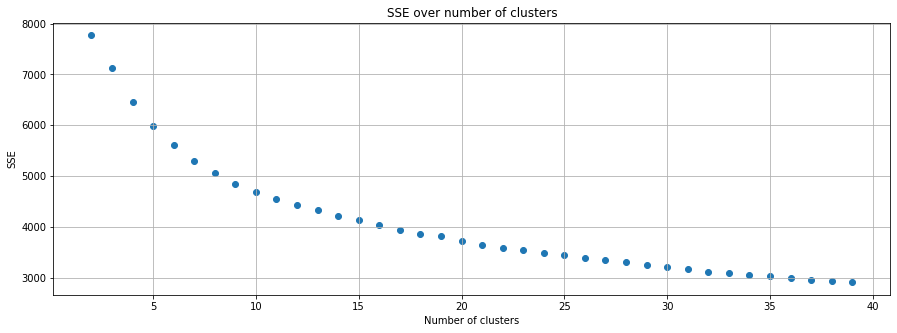

In [4]:
sse, silhouette, n_cluster, gap = [], [], [], []

for i in range(2, 40):
    sse.append(compute_SSE(k_means[i-2]))
    silhouette.append(compute_silhouette(centroids[i-2], labels[i-2]))
    gap.append(compute_gap_statistics(centroids[i-2], labels[i-2], k_means[i-2]))
    n_cluster.append(i)

plt.figure(figsize=(15,5))
plt.grid()
plt.scatter(n_cluster, sse)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("SSE over number of clusters")
plt.show()

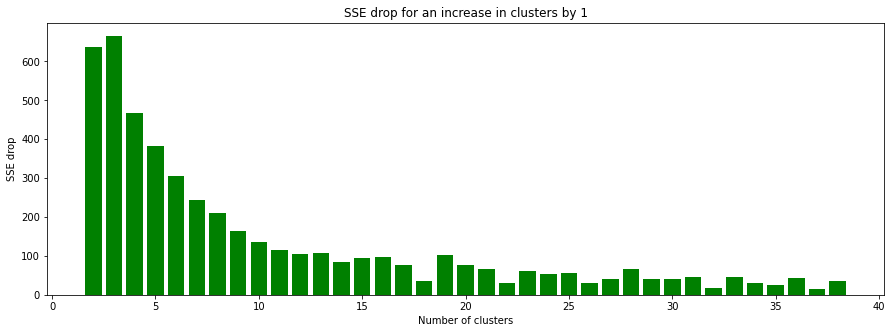

In [5]:
sse_diff = []
for i in range(0, len(sse)-1):
    sse_diff.append(sse[i]-sse[i+1])

plt.figure(figsize=(15,5))
plt.bar(n_cluster[:-1], sse_diff, color='g')
plt.xlabel("Number of clusters")
plt.ylabel("SSE drop")
plt.title("SSE drop for an increase in clusters by 1")
plt.show()

The optimal number of traveller groups using the elbow method is 19. The reason is that the SSE drops significantly when increasing the number of clusters by one until 19 clusters are reached. From 19 to 20 clusters the SSE barely drops. The SSE also do not drop so much anymore by further increasing the number of clusters. Please keep in mind the interpretation according to the elbow method is ambigous.

Two different approaches:

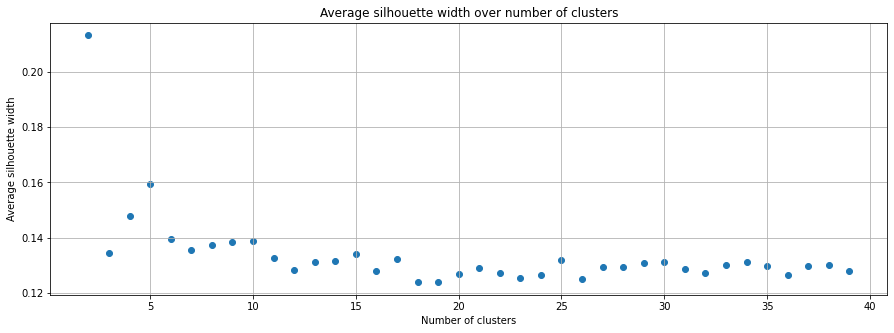

In [6]:
plt.figure(figsize=(15,5))
plt.grid()
plt.scatter(n_cluster, silhouette)
plt.xlabel("Number of clusters")
plt.ylabel("Average silhouette width")
plt.title("Average silhouette width over number of clusters")
plt.show()

According to the silhoutte method, the location of the maximum is considered as the appropriate number of clusters. In our case, the appropriate number of clusters according to the silhouette method is 2.

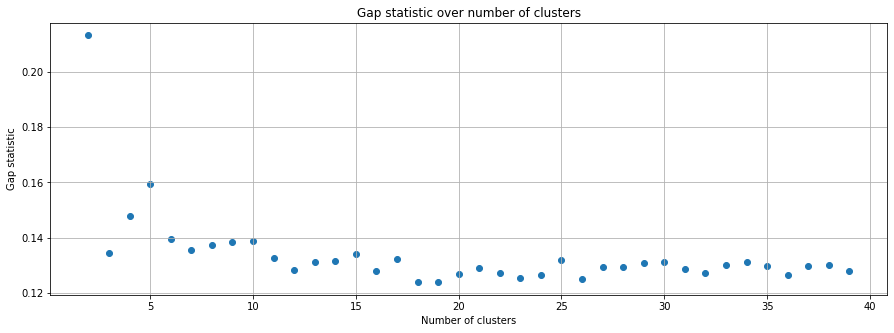

In [7]:
plt.figure(figsize=(15,5))
plt.grid()
plt.scatter(n_cluster, silhouette)
plt.xlabel("Number of clusters")
plt.ylabel("Gap statistic")
plt.title("Gap statistic over number of clusters")
plt.show()

According to the gap statistic, the appropriate number of clusters is 2.

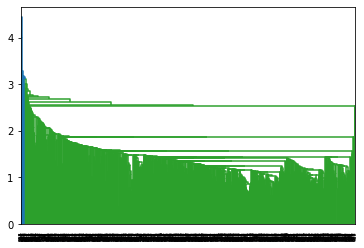

Number of clusters using the method  single :  3


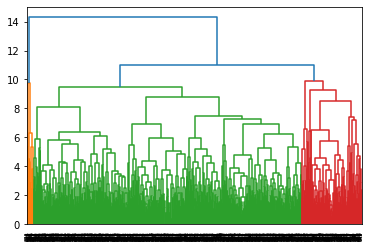

Number of clusters using the method  complete :  4


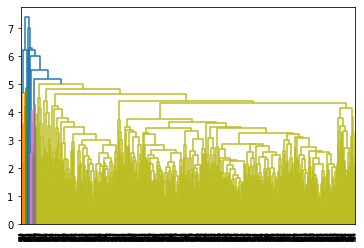

Number of clusters using the method  average :  9


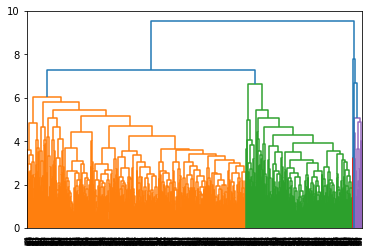

Number of clusters using the method  weighted :  5


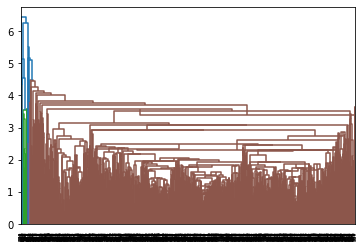

Number of clusters using the method  centroid :  6


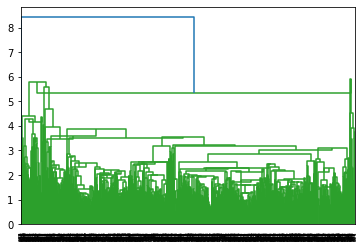

Number of clusters using the method  median :  3


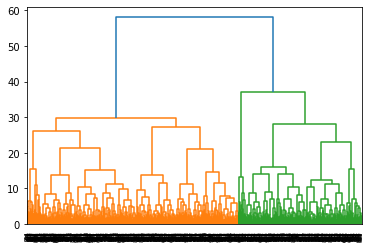

Number of clusters using the method  ward :  3


In [8]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot as plt
def plot_dendogram(method):
    dend = shc.dendrogram(shc.linkage(numpy_arr, method=method))
    plt.show()
    print("Number of clusters using the method ", method, ": ", len(np.unique(np.array(dend["color_list"]))))
    return dend

dend = plot_dendogram("single")
dend = plot_dendogram("complete")
dend = plot_dendogram("average")
dend = plot_dendogram("weighted")
dend = plot_dendogram("centroid")
dend = plot_dendogram("median")
dend = plot_dendogram("ward")


The gap statistic and the average silhouette width show that the appropriate number of clusters is 2 in contrast to the elbow method. The reason for the result of the elbow method is that the sum of squared error still drops significantly after increasing the number of clusters from 2 to 3, from 3 to 4 and so on. 
The hierarchical methods implemented by plotting dendograms show that depending on the chosen method, there is a different outcome.


# Quantification of relationship among variables of dataset and perform dimensionality reduction:

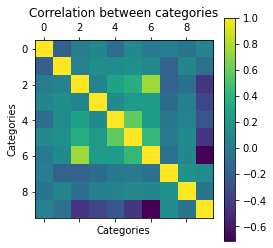

In [9]:
plt.matshow(df.corr())
plt.title("Correlation between categories")
plt.xlabel("Categories")
plt.ylabel("Categories")
plt.colorbar()
plt.show()

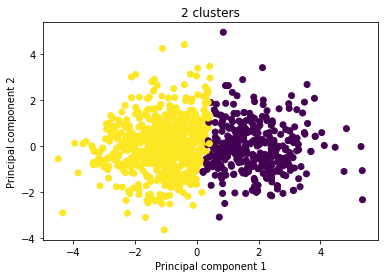

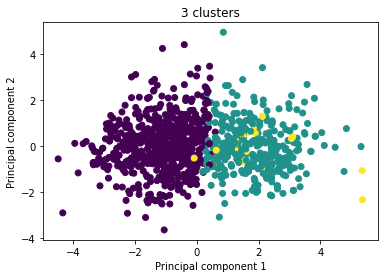

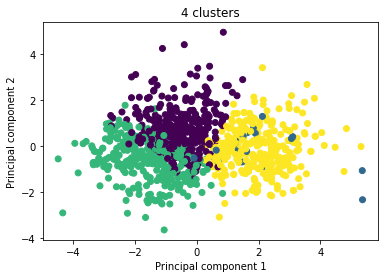

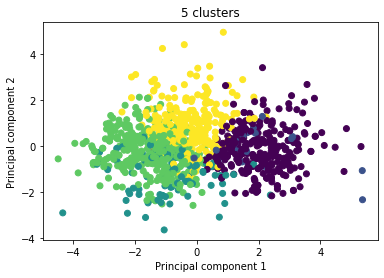

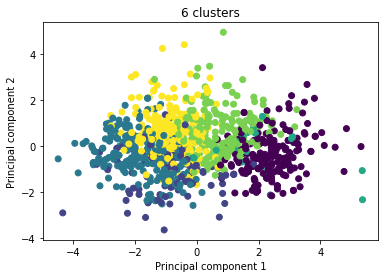

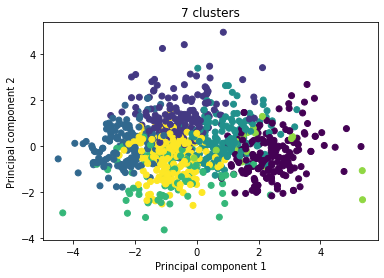

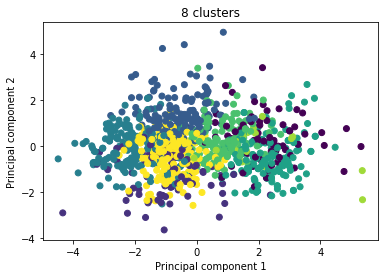

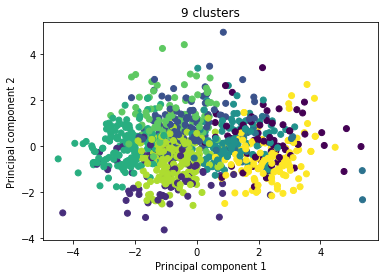

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(numpy_arr)
pca_transf = pca.transform(numpy_arr)

for i in range(2, 10):
    centroids, labels, k_means = get_centroids_and_labels(numpy_arr, n=i)
    plt.scatter(pca_transf[:,0], pca_transf[:,1], c=labels)
    plt.xlabel("Principal component 1")
    plt.ylabel("Principal component 2")
    plt.title(str(i)+" clusters")
    plt.show()




The plots show the first two principle components of the dataset. The principle components are the axis along which the highest variance of the data takes place. PCA is a method to reduce the dimensionality of the data while mostly preserving the similarity and assimilarity of the individual samples. The similarity and assimilarity of the samples are reflected by their distances. As can be seen in the above plots the assimilarity between a small number of clusters can be visualized with only two dimensions. However, as the number of cluster increases this does not hold true anymore. For more than 5 clusters the clusters overlap in the plot of the data which considers only the first two principle components.

There is a loss of information due to the transformation because the dimensionality was reduced from 10 to 2. It can be visualized by plotting the cummulative explained variance ratio over the number of components. This curve quantifies how much of the total, 10-dimensional variance is contained within the first n components. The first two principal components contain about 70% of the total 10-dimensional variance.

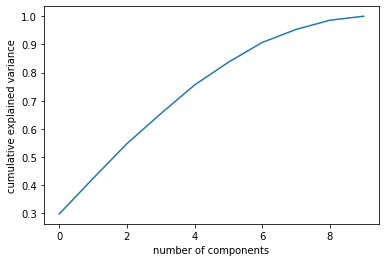

In [11]:
pca = PCA().fit(numpy_arr)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');



Here you can see the relevant parts of the source code of the function pca.explained_variance_ratio_:

Here we count the samples and number of features of our data X:
    n_samples, n_features = X.shape

The center of gravity of the data is computed and subtracted from it.
As a consequence the new center of gravity of the data is located at the origin.
    self.mean_ = np.mean(X, axis=0)
    X -= self.mean_        

Now a singular value decomposition is made. S (is a/are) (vector/vectors) containining the singular valuess
    U, S, Vt = linalg.svd(X, full_matrices=False)


The eigenvalues are computed based on the singular values. The eigenvalues in turn, show the variance of the principle components. By normalizing the variance you receive the explained variance ratio.
    explained_variance_ = (S**2) / (n_samples - 1)
    total_var = explained_variance_.sum()
    explained_variance_ratio_ = explained_variance_ / total_var

# Application of component factor- and projection-based dimensionality reduction

In [17]:
# Factor analysis:

from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis
from sklearn.manifold import TSNE


_, labels_high_dim, k_means_high_dim = get_centroids_and_labels(numpy_arr, n=3)
sse_high_dim = k_means_high_dim.inertia_

transformer = FactorAnalysis(n_components=3, random_state=0)
x_transformed_factor_ana = transformer.fit_transform(numpy_arr)
_, labels_factor_ana, k_means_factor_ana = get_centroids_and_labels(x_transformed_factor_ana, n=3)
sse_factor_ana = k_means_factor_ana.inertia_

tsne = TSNE(n_components = 3)
x_transformed_tsne = tsne.fit_transform(numpy_arr)
_, labels_tsne, k_means_tsne = get_centroids_and_labels(x_transformed_tsne, n=3)
sse_tsne = k_means_tsne.inertia_



def show_plot(data, title, label):
       fig = plt.figure(figsize=(10,10))
       ax = plt.axes(projection="3d")
       ax.set_title(title)
       ax.scatter3D(x_transformed_factor_ana[:,0], x_transformed_factor_ana[:,1], x_transformed_factor_ana[:,2], c=label)
       plt.show()

show_plot(x_transformed_factor_ana, "Clusters in high dimensional space before computation of SSE after factor analysis, SSE:"+str(sse_high_dim), labels_high_dim)
show_plot(x_transformed_factor_ana, "Clusters in low dimensional space after computation of SSE after factor analysis, SSE:"+str(sse_factor_ana), labels_factor_ana)
show_plot(x_transformed_tsne, "Clusters in high dimensional space before computation of SSE t-SNE, SSE:"+str(sse_high_dim), labels_high_dim)
show_plot(x_transformed_tsne, "Clusters in low dimensional space after computation of SSE after t-SNE, SSE:"+str(sse_tsne), labels_tsne)

KeyboardInterrupt: 

# Perform clustering on an easy example

The SSE of the clusters gets smaller after performing each of the dimensionality reduction methods.

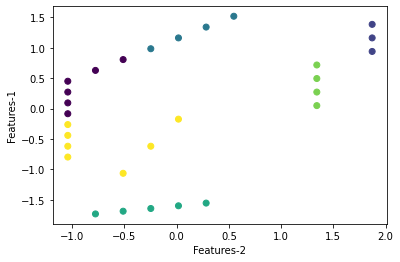

In [31]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

data = np.array([[1,26],[1,30],[1,34],[1,38],[1,42],[1,46],[1,50],[1,54],
                 [2,58],[3,62],[4,66],[5,70],[6,74],[7,78],
                 [2,5],[3,6],[4,7],[5,8],[6,9],
                 [3,20],[4,30],[5,40],
                 [10,45],[10,50],[10,55],[10,60],
                 [12,65],[12,70],[12,75]])
scaled_data = scale(data)
kmeans = KMeans(n_clusters=6).fit(scaled_data)

plt.scatter(scaled_data[:,0],scaled_data[:,1], c=kmeans.labels_)
plt.xlabel("Features-2")
plt.ylabel("Features-1")
plt.show()

There is no reason why it should not be possible to get the same clusters as in the assignment sheet. However, I was not able to reproduce this result. The reason is probably that the initial centroids are set in an unfortunate way so that we and up with the example given above.

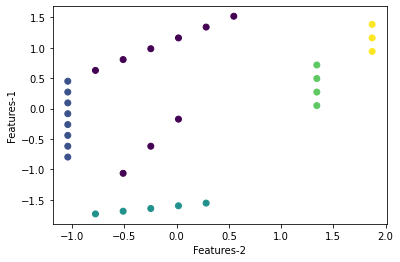

In [40]:
from sklearn.cluster import DBSCAN   
dbscan = DBSCAN(eps=0.3, min_samples=3).fit(scaled_data)
plt.scatter(scaled_data[:,0],scaled_data[:,1], c=dbscan.labels_)
plt.xlabel("Features-2")
plt.ylabel("Features-1")
plt.show()

dbscan produces slightly better results than kmeans. The reason could be that it is density based and does not have initial centroids like kmeans.This is more suitable for this type of data. However, it still does not classify one cluster correctly.

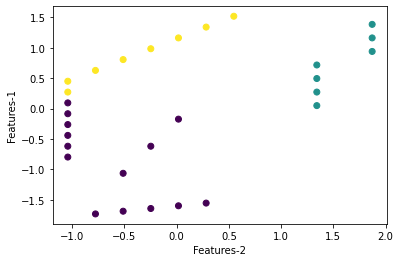

In [42]:
from sklearn.cluster import MeanShift   
meanshift = MeanShift(max_iter=1000).fit(scaled_data)
plt.scatter(scaled_data[:,0],scaled_data[:,1], c=meanshift.labels_)
plt.xlabel("Features-2")
plt.ylabel("Features-1")
plt.show()

Meanshift performs as bad as kmeans.